In [209]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [210]:
nltk.__version__
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('all')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sondo\AppData\Roaming\nltk_data...
[nltk_dat

True

In [237]:
import pandas as pd 

import matplotlib.pyplot as plt

import string
string.punctuation
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report




# Read & Explore data

In [242]:
data=pd.read_csv('IMDB_Dataset.csv')
d=data.copy()

In [213]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [214]:
data.describe(include='all')


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: ylabel='count'>

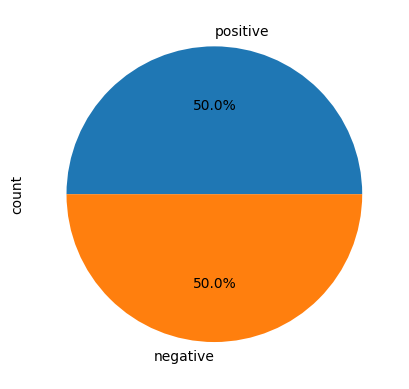

In [215]:
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [217]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [218]:
data.duplicated().sum()

418

# Preprocessing

In [219]:
df=data.copy()

## Remove punctuation , tokenize, remove stopwords, and lemmatization

In [220]:
df['review'] = df['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['review']=df['review'].apply(lambda x: re.sub(r'\b(?:\w*\d\w*|\d+)\b', '', x))
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
df['review'] = df['review'].apply(lambda x: re.sub(r'\.', '', x))

In [221]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stopwords_En])
    return text
df['review'] = df['review'].apply(lambda x: clean_text(x))

In [222]:

lemmatizer = WordNetLemmatizer()
def lemmatize_with_pos(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = tag[0].lower() if tag[0].lower() in ['a', 'n', 'v'] else 'n'  # Map POS tags to WordNet tags
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=pos))
    return ' '.join(lemmatized_tokens)


In [223]:

df['review'] = df['review'].apply(lemmatize_with_pos)
df.head(11)

,review,sentiment
0,one reviewer mention watch oz episode youll ho...,positive
1,wonderful little production br br film techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection date seahunt ...,positive
7,show amazing fresh innovative idea first air f...,negative
8,encourage positive comment film look forward w...,negative
9,like original gut wrench laughter like movie y...,positive


In [224]:
df.head()

,review,sentiment
0,one reviewer mention watch oz episode youll ho...,positive
1,wonderful little production br br film techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [225]:
df['review'][0]

'one reviewer mention watch oz episode youll hook right exactly happen mebr br first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslims gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmate turn prison bitch due la

## Transformation

In [226]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})
df.head()

,review,sentiment
0,one reviewer mention watch oz episode youll ho...,1
1,wonderful little production br br film techniq...,1
2,think wonderful way spend time hot summer week...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


In [227]:
X = df['review']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## BOW

In [228]:
text = " ".join(df['review'])
words = text.split()
total_words = len(words)

# count the number of unique words

unique_words = len(set(words))

print(f"Total number of words: {total_words}")
print(f"Number of unique words: {unique_words}")

Total number of words: 6071495
Number of unique words: 163458


In [229]:
#CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [230]:
#N-gram
ngram_vect = CountVectorizer(ngram_range=(1,3))
X_train_NGRAM = vectorizer.fit_transform(X_train)
X_test_NGRAM = vectorizer.transform(X_test)

In [231]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply Models

In [232]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


Training and evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:


C:\Users\sondo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


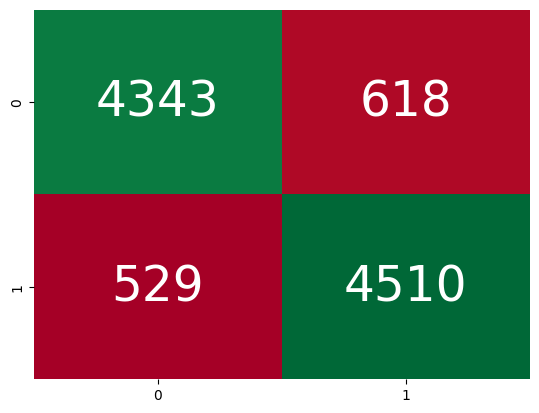

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Training and evaluating Random Forest...
Confusion Matrix for Random Forest:


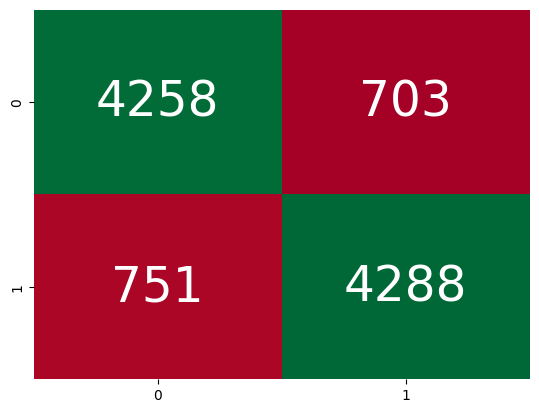

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training and evaluating K-Nearest Neighbors...
Confusion Matrix for K-Nearest Neighbors:


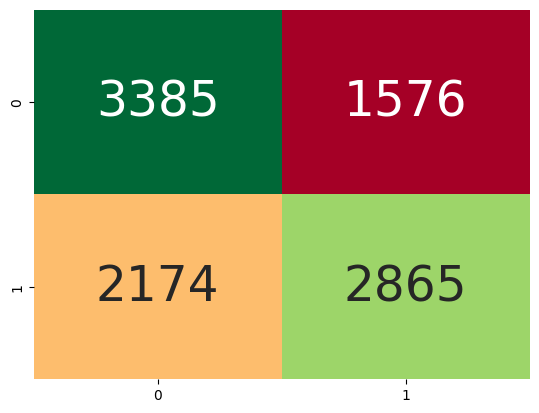

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      4961
           1       0.65      0.57      0.60      5039

    accuracy                           0.62     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.62      0.62     10000


Training and evaluating Naive Bayes...
Confusion Matrix for Naive Bayes:


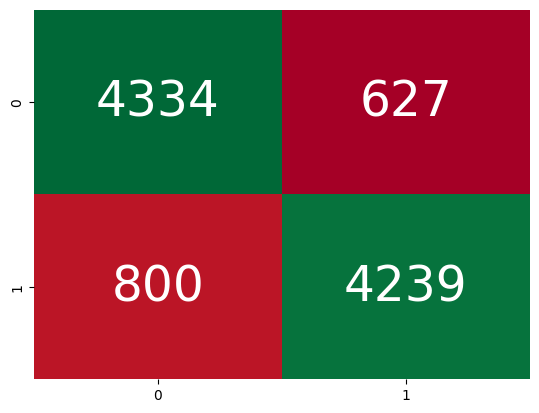

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4961
           1       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training and evaluating Decision Tree...
Confusion Matrix for Decision Tree:


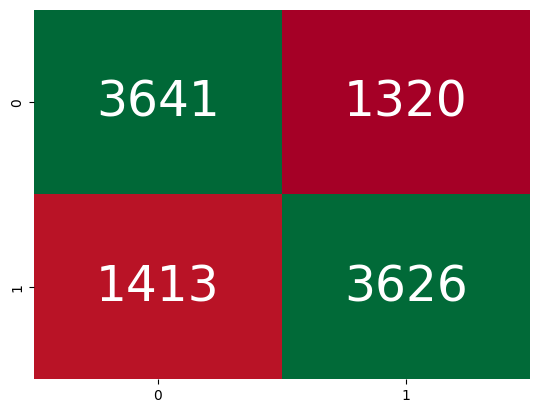

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      4961
           1       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


Training and evaluating XGBoost...
Confusion Matrix for XGBoost:


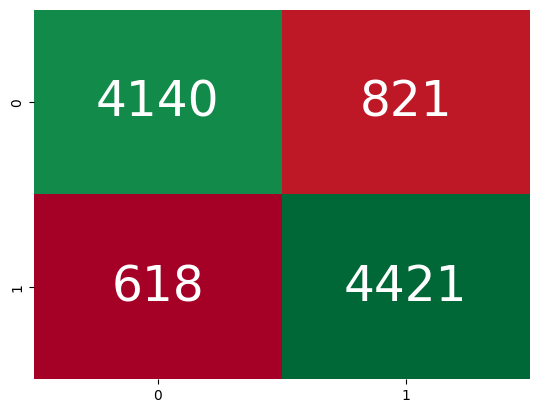

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [234]:
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    model.fit(X_train_NGRAM, y_train)
    y_pred = model.predict(X_test_NGRAM)
    
    print(f"Confusion Matrix for {name}:")
    cm =confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
    plt.show()
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))



Training and evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:


C:\Users\sondo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


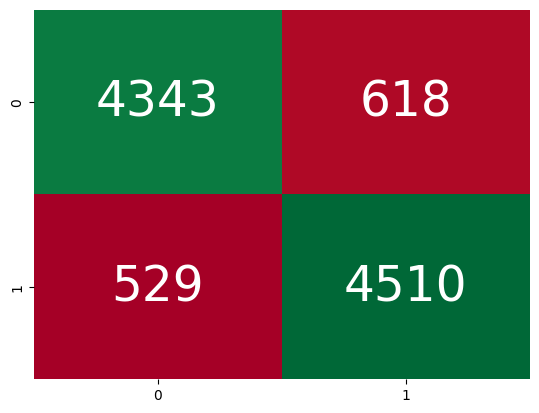

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Training and evaluating Random Forest...
Confusion Matrix for Random Forest:


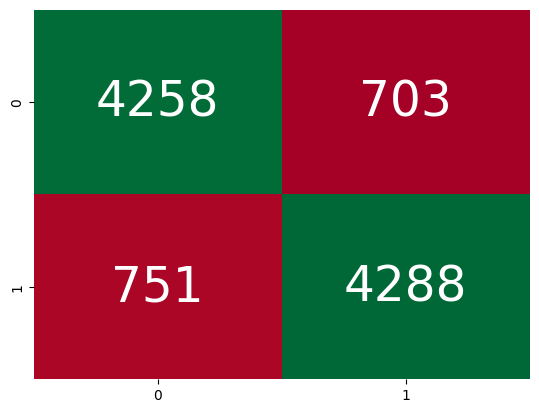

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training and evaluating K-Nearest Neighbors...
Confusion Matrix for K-Nearest Neighbors:


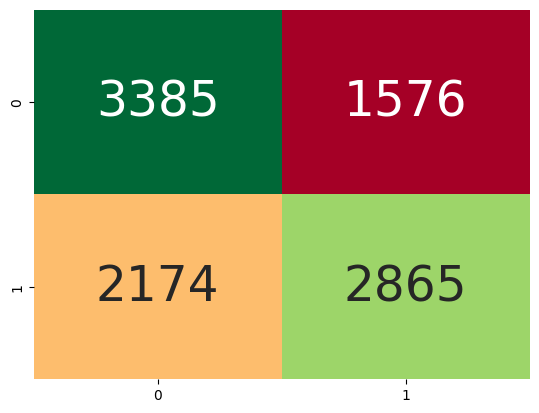

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      4961
           1       0.65      0.57      0.60      5039

    accuracy                           0.62     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.62      0.62     10000


Training and evaluating Naive Bayes...
Confusion Matrix for Naive Bayes:


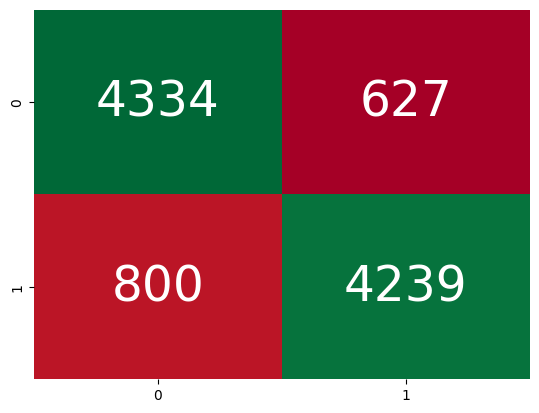

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4961
           1       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training and evaluating Decision Tree...
Confusion Matrix for Decision Tree:


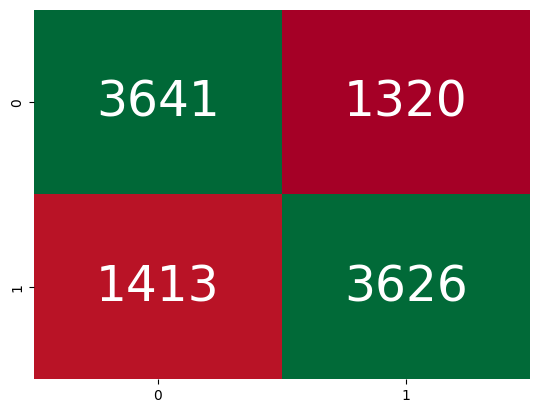

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      4961
           1       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


Training and evaluating XGBoost...
Confusion Matrix for XGBoost:


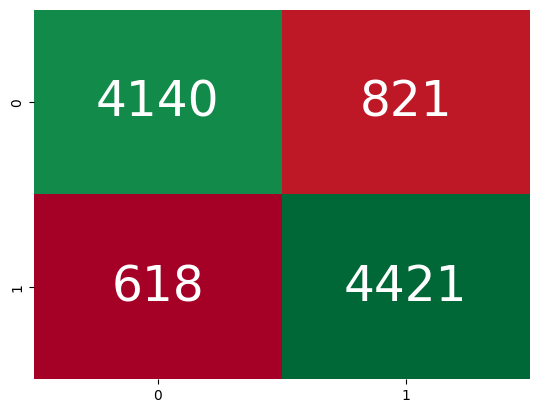

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [235]:
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    print(f"Confusion Matrix for {name}:")
    cm =confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
    plt.show()
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))



Training and evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:


C:\Users\sondo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


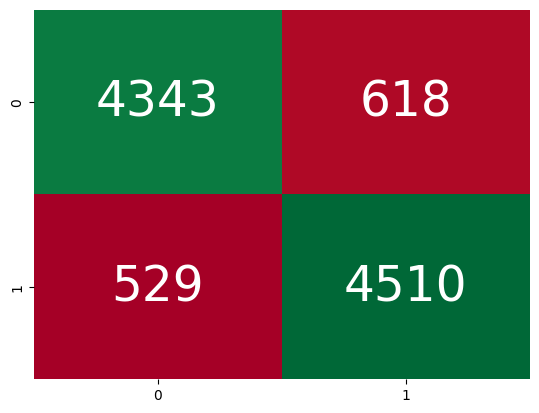

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Training and evaluating Random Forest...
Confusion Matrix for Random Forest:


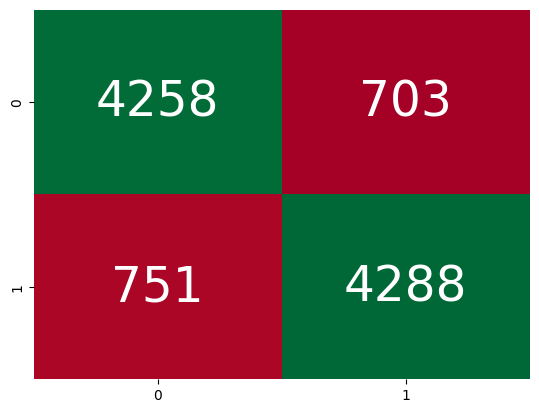

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training and evaluating K-Nearest Neighbors...
Confusion Matrix for K-Nearest Neighbors:


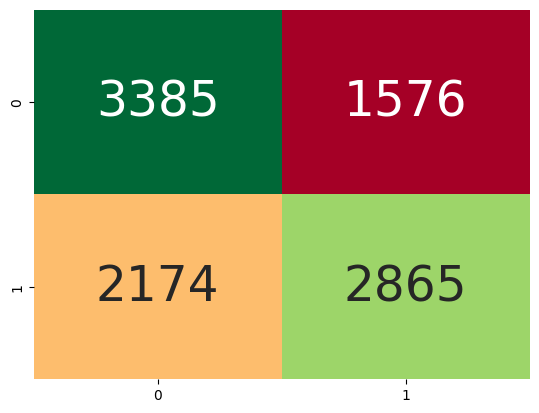

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      4961
           1       0.65      0.57      0.60      5039

    accuracy                           0.62     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.62      0.62     10000


Training and evaluating Naive Bayes...
Confusion Matrix for Naive Bayes:


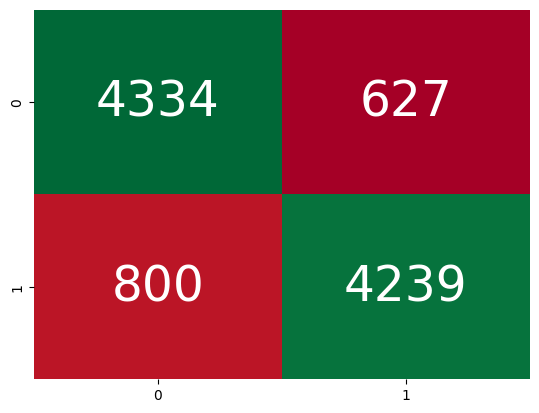

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4961
           1       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training and evaluating Decision Tree...
Confusion Matrix for Decision Tree:


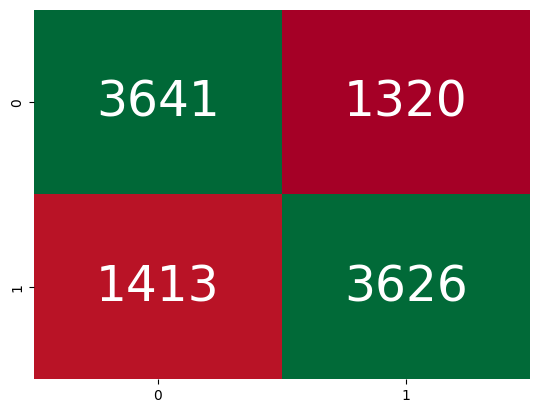

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      4961
           1       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


Training and evaluating XGBoost...
Confusion Matrix for XGBoost:


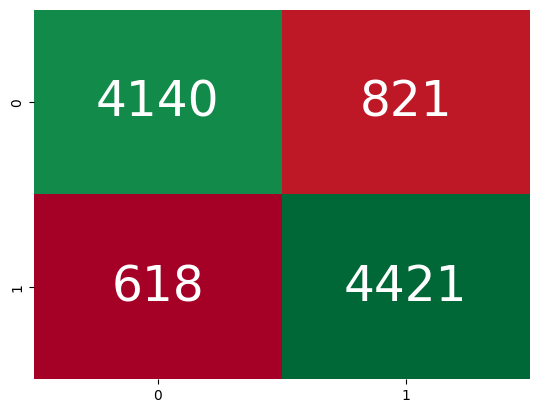

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [233]:
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    model.fit(X_train_vectors, y_train)
    y_pred = model.predict(X_test_vectors)
    
    print(f"Confusion Matrix for {name}:")
    cm =confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
    plt.show()
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


#  sentiment analysis


In [246]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


df['scores']= df['review'].apply(analyzer.polarity_scores)

df['Sentiment'] = df['review'].apply(get_sentiment)

df

,review,sentiment,scores,Sentiment
0,one reviewer mention watch oz episode youll ho...,1,"{'neg': 0.291, 'neu': 0.604, 'pos': 0.105, 'co...",1
1,wonderful little production br br film techniq...,1,"{'neg': 0.075, 'neu': 0.656, 'pos': 0.269, 'co...",1
2,think wonderful way spend time hot summer week...,1,"{'neg': 0.149, 'neu': 0.545, 'pos': 0.306, 'co...",1
3,basically there family little boy jake think t...,0,"{'neg': 0.215, 'neu': 0.65, 'pos': 0.135, 'com...",1
4,petter matteis love time money visually stunni...,1,"{'neg': 0.03, 'neu': 0.737, 'pos': 0.233, 'com...",1
...,...,...,...,...
49995,think movie right good job wasnt creative orig...,1,"{'neg': 0.08, 'neu': 0.617, 'pos': 0.303, 'com...",1
49996,bad plot bad dialogue bad act idiotic direct a...,0,"{'neg': 0.311, 'neu': 0.485, 'pos': 0.204, 'co...",1
49997,catholic teach parochial elementary school nun...,0,"{'neg': 0.237, 'neu': 0.586, 'pos': 0.177, 'co...",1
49998,im go disagree previous comment side maltin on...,0,"{'neg': 0.166, 'neu': 0.688, 'pos': 0.145, 'co...",1


In [247]:
print(confusion_matrix(df['sentiment'], df['Sentiment']))
print(classification_report(df['sentiment'], df['Sentiment']))

[[  153 24847]
 [   40 24960]]
              precision    recall  f1-score   support

           0       0.79      0.01      0.01     25000
           1       0.50      1.00      0.67     25000

    accuracy                           0.50     50000
   macro avg       0.65      0.50      0.34     50000
weighted avg       0.65      0.50      0.34     50000

